In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from dateutil.parser import parse

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with= engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session =  Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date =(session.query(Measurement.date)
             .order_by(Measurement.date.desc())
                .first())
formatted_date = parse(most_recent_date[0]).date()
print(formatted_date)

2017-08-23


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
twelve_month = dt.date(2017,8,23)-dt.timedelta(days = 365)

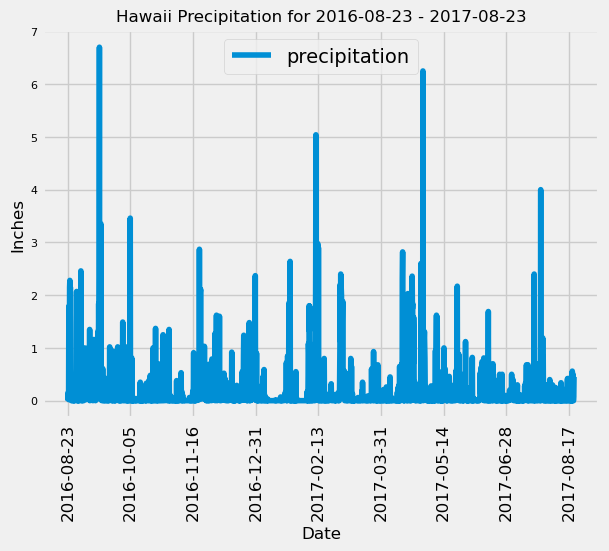

In [11]:
# Calculate the date one year from the last date in data set.
previous_last_date = dt.date(twelve_month.year, twelve_month.month, twelve_month.day)

# Perform a query to retrieve the data and precipitation scores
result= session.query(Measurement.date, Measurement.prcp).\
         filter(Measurement.date >= previous_last_date).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
data_df =pd.DataFrame(result, columns=['date', 'precipitation'])

# Sort the dataframe by date
data_df.set_index(data_df['date'], inplace = True)

#drop N/A cells
clean_data_df = data_df.dropna()

# Use Pandas Plotting with Matplotlib to plot the data
clean_data_df.plot('date', 'precipitation')

plt.xlabel("Date",  size = 12)
plt.ylabel("Inches", size = 12)
plt.title(f"Hawaii Precipitation for {twelve_month} - {formatted_date}", size = 12)
plt.legend(["precipitation"],loc='best')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 8)
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
clean_data_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.id).count()

9

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
#Answer the following question: which station id has the greatest number of observations?
#station with id = USC00519281  has the greatest number of observations

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
first_station_id = stations[0][0]
first_sation_query_res = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs))\
    .filter(Measurement.station==first_station_id).all()
first_sation_query_res 

[(54.0, 85.0, 71.66378066378067)]

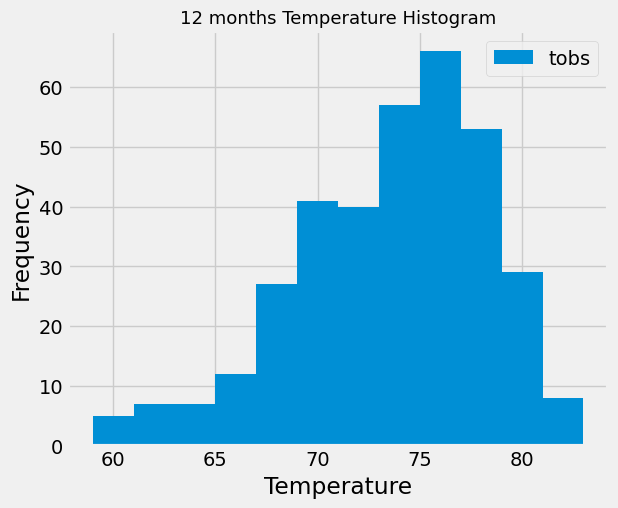

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).filter(Measurement.station==first_station_id)\
    .filter(Measurement.date>=twelve_month).all()

#Plot results
high_station_temp=pd.DataFrame(results,columns=['tobs'])
high_station_temp.plot.hist(bins=12)
plt.tight_layout()
plt.title("12 months Temperature Histogram", size=13)
plt.xlabel("Temperature")
plt.ylabel("Frequency")

plt.show()

# Close Session

In [17]:
# Close Session
session.close()